In [57]:
import rasterio
import matplotlib.pyplot as plt

# Specify the file path to your .tif file
file_path = '/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/wp3/data/satellite_imagery/esa_10/RW2019L8/RW201900000002.tif'

# Open the .tif file using rasterio
with rasterio.open(file_path) as dataset:
    
    bands = dataset.read([4,3,2])

    

In [58]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()
band1 = bands[1]
band1_flat = band1.flatten()

# Remove 'no data' values if they exist (e.g., if nodata is represented by -9999 or similar)
band1_clean = band1_flat[band1_flat != dataset.nodata] if dataset.nodata else band1_flat

# Convert the cleaned pixel data into a pandas DataFrame
df = pd.DataFrame({'pixel_value': band1_clean})

# Create a histogram using Altair
histogram = alt.Chart(df).mark_bar().encode(
    alt.X('pixel_value:Q', bin=alt.Bin(maxbins=50), title='Pixel Value'),  # Binning pixel values
    alt.Y('count()', title='Frequency')  # Counting occurrences for each bin
).properties(
    title='Histogram of Pixel Values',
    width=600,
    height=400
)

# Display the histogram
histogram

alt.Chart(...)

In [4]:
import numpy as np
from PIL import Image
import rasterio
file_path = '/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/wp3/data/satellite_imagery/esa_10/RW2019S2/RW201900000370.tif'
# Open the .tif file using rasterio
with rasterio.open(file_path) as dataset:
    # Read bands 4 (red), 3 (green), and 2 (blue)
    red = dataset.read(4)
    green = dataset.read(3)
    blue = dataset.read(2)

# Function to normalize the pixel values to the range 0-255
def normalize(array):
    array_min, array_max = 0, 3000
    normalized = ((array - array_min) / (array_max - array_min) * 255).astype(np.float32)
    # return (array/1000).astype(np.uint8)
    # Clip values to the specified range (0-255 by default)
    return np.clip(normalized, 0, 255).astype(np.uint8)

# Normalize the bands
red_norm = normalize(red)
green_norm = normalize(green)
blue_norm = normalize(blue)

# Stack the bands to create an RGB image (Bands: Red, Green, Blue)
rgb_image = np.stack([red_norm, green_norm, blue_norm], axis=-1)

# Create an image using PIL
image = Image.fromarray(rgb_image)

# Display the image
output_path = "output_image.png"
image.save(output_path)

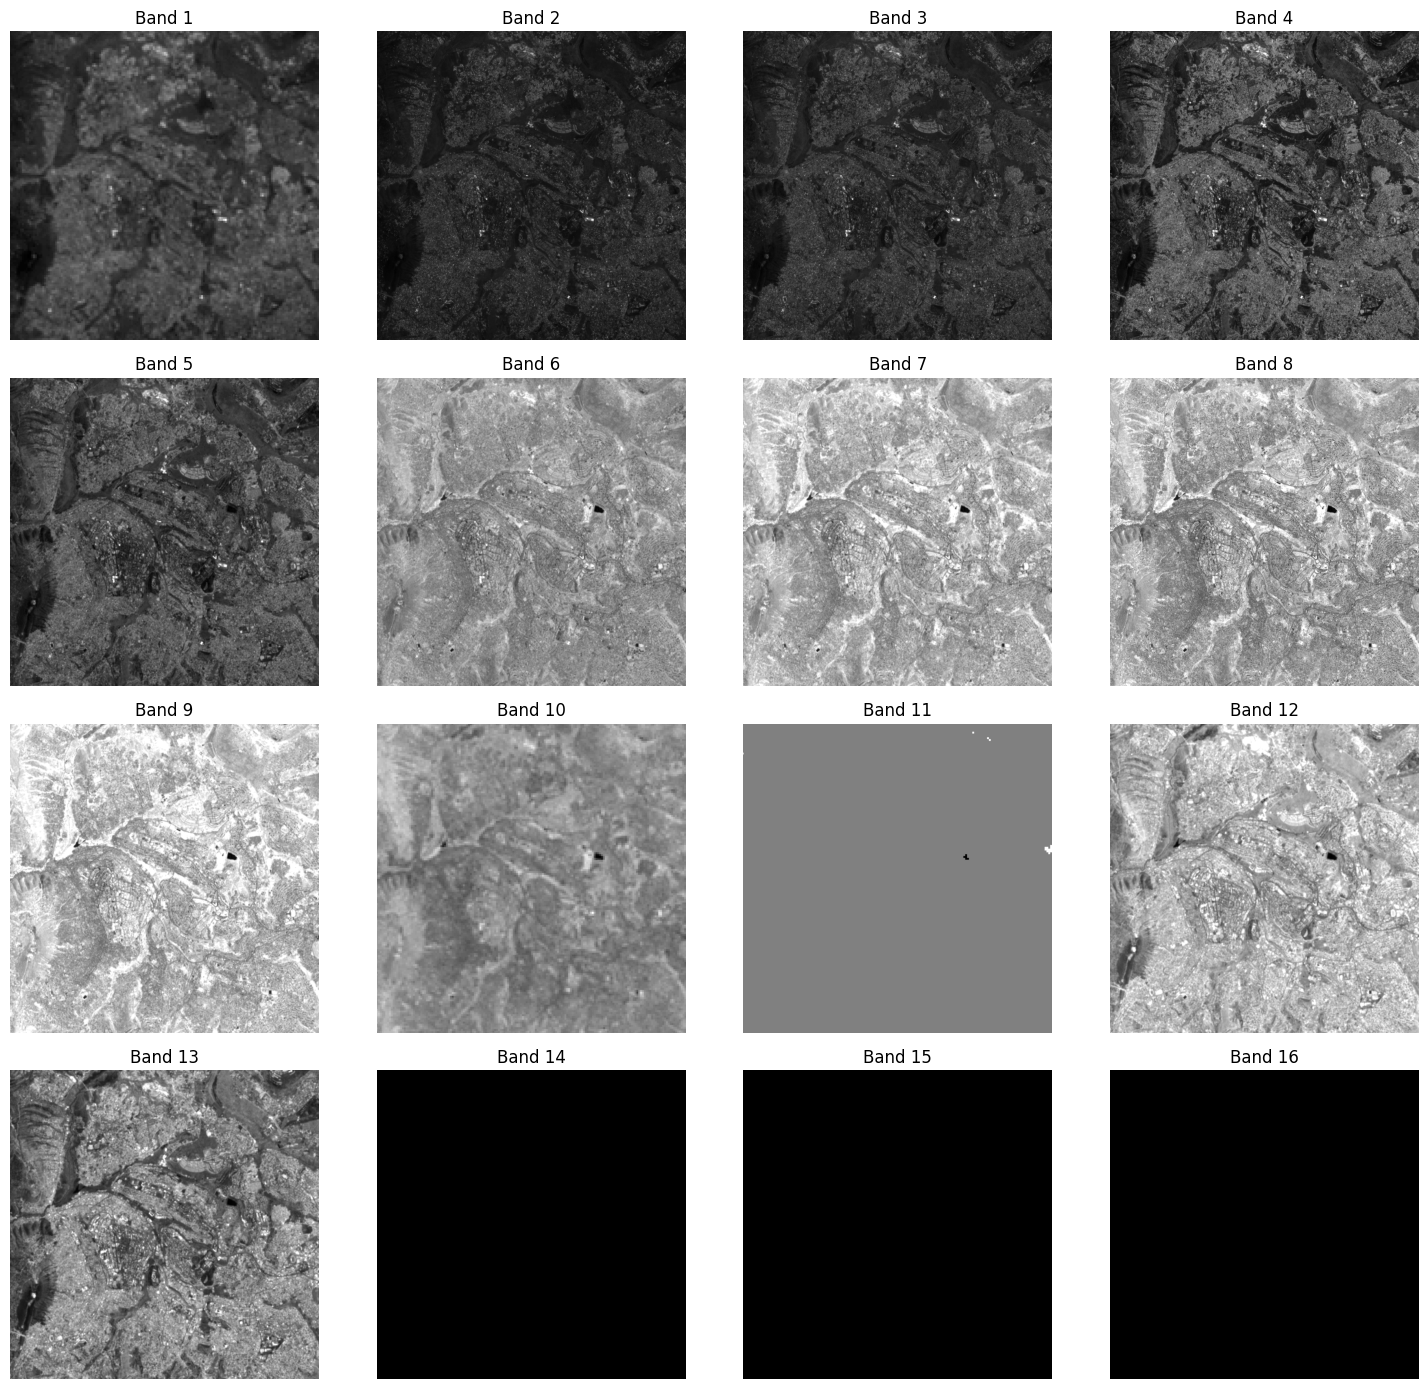

Saved band_01.png
Saved band_02.png
Saved band_03.png
Saved band_04.png
Saved band_05.png
Saved band_06.png
Saved band_07.png
Saved band_08.png
Saved band_09.png
Saved band_10.png
Saved band_11.png
Saved band_12.png
Saved band_13.png
Saved band_14.png
Saved band_15.png
Saved band_16.png


In [10]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from PIL import Image

file_path = "/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/wp3/data/satellite_imagery/esa_10/RW2019S2/RW201900000370.tif"

def normalize(array, array_min=0, array_max=3000):
    """
    Linearly scale values in 'array' from [array_min, array_max] to [0, 255],
    then clip and convert to uint8.
    Adjust array_min/array_max if necessary for your data.
    """
    array = array.astype(np.float32)
    scaled = (array - array_min) / (array_max - array_min) * 255.0
    scaled = np.clip(scaled, 0, 255)
    return scaled.astype(np.uint8)

# ---------------------------
# 1) READ & NORMALIZE BANDS
# ---------------------------
with rasterio.open(file_path) as src:
    band_count = src.count
    # all_bands shape: (band_count, height, width)
    all_bands = src.read()

# Normalize each band
normalized_bands = []
for i in range(band_count):
    band_data = all_bands[i]
    band_norm = normalize(band_data, array_min=0, array_max=3000)
    normalized_bands.append(band_norm)

# Convert list to NumPy array again for convenience
normalized_bands = np.array(normalized_bands)

# ----------------------------------
# 2) VISUALIZE EACH BAND SEPARATELY
# ----------------------------------
# For Sentinel-2 with 13 bands, create a grid of subplots 
cols = 4  # number of columns in subplot grid
rows = int(np.ceil(band_count / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 3.5 * rows))

for i in range(band_count):
    row_idx, col_idx = divmod(i, cols)
    ax = axes[row_idx, col_idx] if rows > 1 else axes[col_idx]
    
    ax.imshow(normalized_bands[i], cmap="gray")
    ax.set_title(f"Band {i+1}")
    ax.axis("off")

# If the total number of subplots > band_count, hide the unused subplots
for j in range(band_count, rows * cols):
    row_idx, col_idx = divmod(j, cols)
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()
plt.show()

# -------------------------------------------
# 3) (OPTIONAL) SAVE EACH BAND AS A PNG FILE
# -------------------------------------------
for i in range(band_count):
    img = Image.fromarray(normalized_bands[i])
    output_path = f"band_{i+1:02d}.png"  # e.g., band_01.png, band_02.png, ...
    img.save(output_path)
    print(f"Saved {output_path}")

In [3]:
rgb_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('/home/cs-yang3/rds/rds-t2-cs177-KNoCjrg2atA/cs-yang3/code/KidSat/survey_processing/processed_data/dhs_processed.csv')
df = df[df.YEAR == 2019]
# Define the coordinates of Kigali, Rwanda
kigali_coords = (-1.9536, 30.0794)


# Coordinates of Kigali
kigali_lat, kigali_lon = -1.9536, 30.0794

# Compute Euclidean distance in latitude-longitude space
df["distance_euclid"] = np.sqrt(
    (df["LATNUM"] - kigali_lat)**2 + (df["LONGNUM"] - kigali_lon)**2
)

# Get the row with the minimal Euclidean distance
closest_row = df.loc[df["distance_euclid"].idxmin()]

# print(df)
closest_row.deprived_sev

0.0816326530612244

/rds/project/rds-KNoCjrg2atA/cs-yang3/envs/sat/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_3238572/3987877024.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if

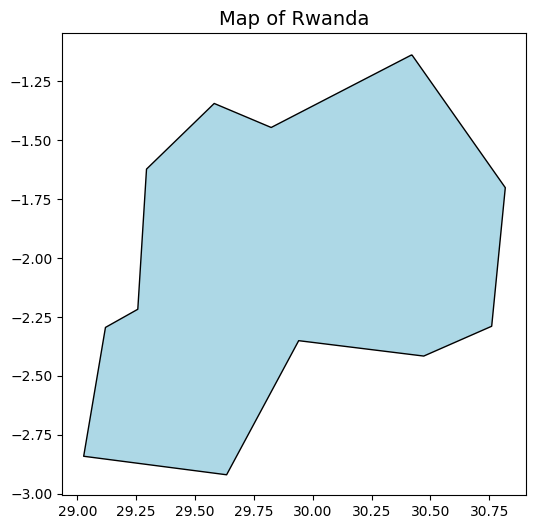

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# This URL points to a publicly available GeoJSON file for Rwanda's boundaries
rwanda_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/RWA.geo.json"

# Read the data into a GeoDataFrame
rwanda = gpd.read_file(rwanda_url)

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))
rwanda.plot(ax=ax, color="lightblue", edgecolor="black")
ax.set_title("Map of Rwanda", fontsize=14)
plt.show()